In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

'''
Dicionário de Dados
PassengerId: Número de identificação do passageiro
Survived: Informa se o passageiro sobreviveu ao desastre
0 = Não
1 = Sim
Pclass: Classe do bilhete
1 = 1ª Classe
2 = 2ª Classe
3 = 3ª Classe
Name: Nome do passageiro
Sex: Sexo do passageiro
Age: Idade do passageiro
SibSp: Quantidade de cônjuges e irmãos a bordo
Parch: Quantidade de pais e filhos a bordo
Ticket: Número da passagem
Fare: Preço da Passagem
Cabin: Número da cabine do passageiro
Embarked: Porto no qual o passageiro embarcou
C = Cherbourg
Q = Queenstown
S = Southampton
'''

'\nDicionário de Dados\nPassengerId: Número de identificação do passageiro\nSurvived: Informa se o passageiro sobreviveu ao desastre\n0 = Não\n1 = Sim\nPclass: Classe do bilhete\n1 = 1ª Classe\n2 = 2ª Classe\n3 = 3ª Classe\nName: Nome do passageiro\nSex: Sexo do passageiro\nAge: Idade do passageiro\nSibSp: Quantidade de cônjuges e irmãos a bordo\nParch: Quantidade de pais e filhos a bordo\nTicket: Número da passagem\nFare: Preço da Passagem\nCabin: Número da cabine do passageiro\nEmbarked: Porto no qual o passageiro embarcou\nC = Cherbourg\nQ = Queenstown\nS = Southampton\n'

In [261]:
train_url = "titanic.csv"
train = pd.read_csv(train_url)

In [262]:
print("***** Conjunto de Treinamento *****")
print(train.head())

***** Conjunto de Treinamento *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0           

In [263]:
print("***** Conjunto de Treinamento *****")
print(train.describe())

***** Conjunto de Treinamento *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [264]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [265]:
# Verifica quais valores são nulos (conjunto de treino)
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [266]:
print("***** Realiza a soma dos registros com valores nulos (conjunto de treinamento) *****")
print(train.isna().sum())

***** Realiza a soma dos registros com valores nulos (conjunto de treinamento) *****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [267]:
# Preenche valores faltantes com a média da coluna (conjunto de treinamento)
train.fillna(train.mean(), inplace=True)

In [268]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [269]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [270]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [271]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [272]:
train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [273]:
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


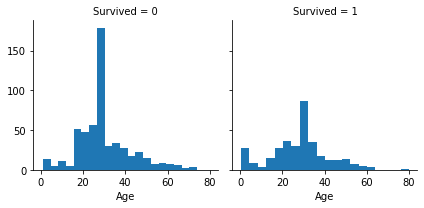

In [274]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

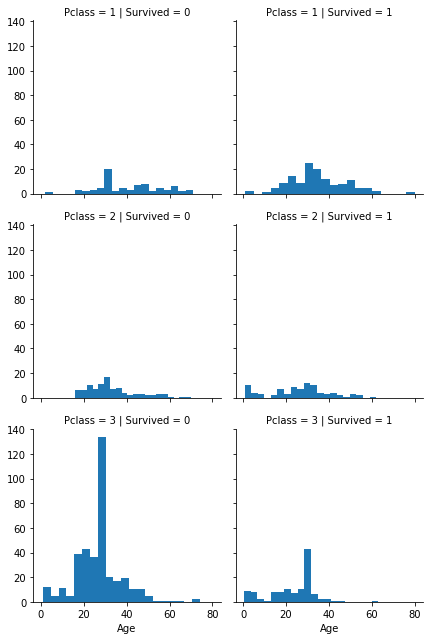

In [275]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

In [276]:
# Alguns atributos são numéricos e outros não 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [277]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [278]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])

In [279]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [280]:
# Verificando se os valores são numéricos ou não
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [281]:
X = np.array(train.drop(['Survived'], 1).astype(float))

In [282]:
y = np.array(train['Survived'])

In [283]:
kmeans = KMeans(n_clusters=2) # Objetiva agrupar o conjunto em 2 grupos: Sobrevientes (Survived) ou Não Sobreviventes (Not survived)
kmeans.fit(X)
#print(kmeans.labels_)
print(kmeans.cluster_centers_)

[[2.23500000e+02 2.34080717e+00 6.16591928e-01 2.88100277e+01
  5.87443946e-01 3.94618834e-01 3.24868262e+01]
 [6.69000000e+02 2.27640449e+00 6.78651685e-01 3.05902056e+01
  4.58426966e-01 3.68539326e-01 3.19209546e+01]]


In [284]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


In [290]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=2000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [291]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


In [292]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 1.        , 1.        , ..., 0.125     , 0.        ,
        0.01415106],
       [0.0011236 , 0.        , 0.        , ..., 0.125     , 0.        ,
        0.13913574],
       [0.00224719, 1.        , 0.        , ..., 0.        , 0.        ,
        0.01546857],
       ...,
       [0.99775281, 1.        , 0.        , ..., 0.125     , 0.33333333,
        0.04577135],
       [0.9988764 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.01512699]])

In [293]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=2000)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [294]:
correct = 0
for i in range(len(X_scaled)):
    predict_me = np.array(X_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.7867564534231201


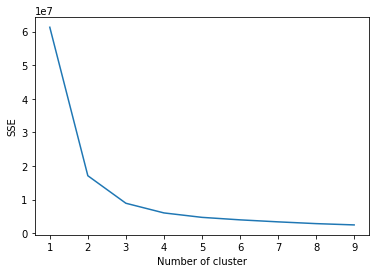

In [300]:
#Elbow Criterion Method:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [301]:
#Silhouette Coefficient (titanic)

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(X, label, metric='euclidean')
    print("Para n_clusters={}, o coeficiente de  Silhouette {}".format(k, sil_coeff))

Para n_clusters=2, o coeficiente de  Silhouette 0.5951870787803006
Para n_clusters=3, o coeficiente de  Silhouette 0.5381718179878155
Para n_clusters=4, o coeficiente de  Silhouette 0.49596612973718085
Para n_clusters=5, o coeficiente de  Silhouette 0.46594668064600053
Para n_clusters=6, o coeficiente de  Silhouette 0.4371243787590725
Para n_clusters=7, o coeficiente de  Silhouette 0.44796647873978057
Para n_clusters=8, o coeficiente de  Silhouette 0.46343230881938263
Para n_clusters=9, o coeficiente de  Silhouette 0.43734903343375897
Para n_clusters=10, o coeficiente de  Silhouette 0.41974089950836163


In [3]:
from sklearn import datasets
Iris_X, y = datasets.load_iris(return_X_y=True)

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(Iris_X)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(Iris_X, label, metric='euclidean')
    print("Para n_clusters={}, o coeficiente de  Silhouette {}".format(k, sil_coeff))

Para n_clusters=2, o coeficiente de  Silhouette 0.681046169211746
Para n_clusters=3, o coeficiente de  Silhouette 0.5528190123564091
Para n_clusters=4, o coeficiente de  Silhouette 0.4980505049972867
Para n_clusters=5, o coeficiente de  Silhouette 0.4887488870931048
Para n_clusters=6, o coeficiente de  Silhouette 0.3648340039670018
Para n_clusters=7, o coeficiente de  Silhouette 0.34750423280461507
Para n_clusters=8, o coeficiente de  Silhouette 0.3387058211637936
Para n_clusters=9, o coeficiente de  Silhouette 0.33390862580831443
Para n_clusters=10, o coeficiente de  Silhouette 0.32384870397751486


In [302]:
#Calinski-Harabasz Index
 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    label = kmeans.labels_
    cal_haha = metrics.calinski_harabasz_score(X, label)
    print("Para k={}, o Calinski-Harabasz index é {}".format(k, cal_haha))

Para k=2, o Calinski-Harabasz index é 2300.236982136431
Para k=3, o Calinski-Harabasz index é 2616.2808679798363
Para k=4, o Calinski-Harabasz index é 2717.063917778652
Para k=5, o Calinski-Harabasz index é 2672.134500723379
Para k=6, o Calinski-Harabasz index é 2569.153415310632
Para k=7, o Calinski-Harabasz index é 2545.165628812519
Para k=8, o Calinski-Harabasz index é 2602.62750249919
Para k=9, o Calinski-Harabasz index é 2657.046805122902
Para k=10, o Calinski-Harabasz index é 2694.2660157993164


In [4]:
#Calinski-Harabasz Index
 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(Iris_X)
    label = kmeans.labels_
    cal_haha = metrics.calinski_harabasz_score(Iris_X, label)
    print("Para k={}, o Calinski-Harabasz index é {}".format(k, cal_haha))

Para k=2, o Calinski-Harabasz index é 513.9245459802768
Para k=3, o Calinski-Harabasz index é 561.62775662962
Para k=4, o Calinski-Harabasz index é 530.7658081872851
Para k=5, o Calinski-Harabasz index é 495.54148767768777
Para k=6, o Calinski-Harabasz index é 473.8506068330425
Para k=7, o Calinski-Harabasz index é 447.9633589734348
Para k=8, o Calinski-Harabasz index é 437.6032109356823
Para k=9, o Calinski-Harabasz index é 408.27457891903964
Para k=10, o Calinski-Harabasz index é 383.8516755984664
